In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
#import seaborn
import logging

from matplotlib import rcParams
from matplotlib.ticker import FormatStrFormatter

In [2]:
from dalila.parameters_research import tune_parameters
from dalila.dictionary_learning import DictionaryLearning
from dalila.penalty import L1Penalty

In [3]:
from utils import *

In [4]:
from scipy.io import loadmat
from unicodedata import normalize
filename = "/home/veronica/Desktop/UVM/mutation_signatures/datasets/breast_cancer_data.mat"
data = loadmat(filename, appendmat=False)
v = data["originalGenomes"]
types = data["types"]
l = len(types)
types_1 = [None] * l
for i in range(0, l):
    types_1[i] = normalize('NFKD', types[i][0][0]).encode('ascii','ignore')
data = v.T
types = np.asarray(types_1)

In [22]:

res = remove_weak_mutations(data, 0.01)
X = res["mutational_catalogue"]
removed_cols = res["removed_cols"]

estimator = DictionaryLearning(k=28,
                               dict_penalty=L1Penalty(1),
                               coeff_penalty=L1Penalty(1),
                               dict_normalization=1,
                               non_negativity="both")

best_estimator  = tune_parameters(X, estimator=estimator,
                                 distributed=1,
                                 scheduler_host='10.251.61.227:8786',
                                 analysis=3,
                                 non_negative="both",
                                 max_k=10,
                                 dict_penalty_range=(0.01, 0.1, 10),
                                 coeff_penalty_range=(0.001, 0.01, 10))



10
Fitting 3 folds for each of 800 candidates, totalling 2400 fits


[Parallel(n_jobs=14)]: Done  72 tasks      | elapsed:  8.3min
[Parallel(n_jobs=14)]: Done 322 tasks      | elapsed: 27.9min
[Parallel(n_jobs=14)]: Done 672 tasks      | elapsed: 57.3min
[Parallel(n_jobs=14)]: Done 1122 tasks      | elapsed: 93.8min
[Parallel(n_jobs=14)]: Done 1672 tasks      | elapsed: 138.0min
[Parallel(n_jobs=14)]: Done 2400 out of 2400 | elapsed: 195.6min finished


In [25]:
print(best_estimator.dict_penalty._lambda)
print(best_estimator.coeff_penalty._lambda)
print(best_estimator.k)

0.035938136638
0.00464158883361
9


In [26]:
C,D = best_estimator.decomposition()
D = add_removed_cols(D, removed_cols)
D_ordered = ordering_for_types(D, types)

In [27]:
C = np.load("breast25_ourMethod/coefficients.npy")
D = np.load("breast25_ourMethod/dictionary.npy")
D_ordered = np.load("breast25_ourMethod/dictionary_ordered.npy")

In [28]:
np.save("breast25_ourMethod/best_estimator_5may.npy", best_estimator)
np.save("breast25_ourMethod/dictionary_5may.npy", D)
np.save("breast25_ourMethod/dictionary_ordered_5may.npy", D_ordered)
np.save("breast25_ourMethod/coefficients_5may.npy", C)

In [29]:
print(best_estimator.reconstruction_error())
print(best_estimator.objective_function_value())
print(best_estimator.k)

0.00952194170439
67698.7105754
9


In [30]:
percentages = np.zeros_like(C)

for sample in range(C.shape[0]):
    total = np.sum(C[sample,:])
    if(total != 0):
        percentages[sample,:] = C[sample, :] / total 

print(percentages)

[[ 0.45110988  0.          0.02496634  0.05110031  0.34455383  0.12826963]
 [ 0.05008436  0.28755455  0.15369352  0.02703774  0.43256349  0.04906634]
 [ 0.07460728  0.120721    0.2661162   0.16099114  0.37756439  0.        ]
 [ 0.0632677   0.24407132  0.03753295  0.06839122  0.43208623  0.15465059]
 [ 0.04314035  0.24311925  0.          0.2966297   0.41711071  0.        ]
 [ 0.05216718  0.30098426  0.17049582  0.06872579  0.18656813  0.22105882]
 [ 0.01134896  0.21314957  0.          0.03135714  0.69215945  0.05198488]
 [ 0.44835985  0.03863971  0.08808075  0.12608579  0.29772699  0.00110692]
 [ 0.16724159  0.22503861  0.01602564  0.01185398  0.21259495  0.36724523]
 [ 0.52721567  0.08216328  0.10481641  0.09242217  0.14813559  0.04524688]
 [ 0.34776785  0.05490989  0.2711167   0.11439725  0.11392972  0.09787859]
 [ 0.02763019  0.          0.29925874  0.10509013  0.56802094  0.        ]
 [ 0.26288951  0.24449272  0.23980487  0.04169419  0.21111872  0.        ]
 [ 0.0869898   0.18901874

In [31]:
max_indices = np.zeros((percentages.shape[1]))
max_values = np.zeros((percentages.shape[1]))

for atom in range(percentages.shape[1]):
    max_indices[atom] = np.argmax(percentages[:,atom])
    max_values[atom] = percentages[int(max_indices[atom]), atom]

('The percentages of usage is: ', 0.52721566557068389)


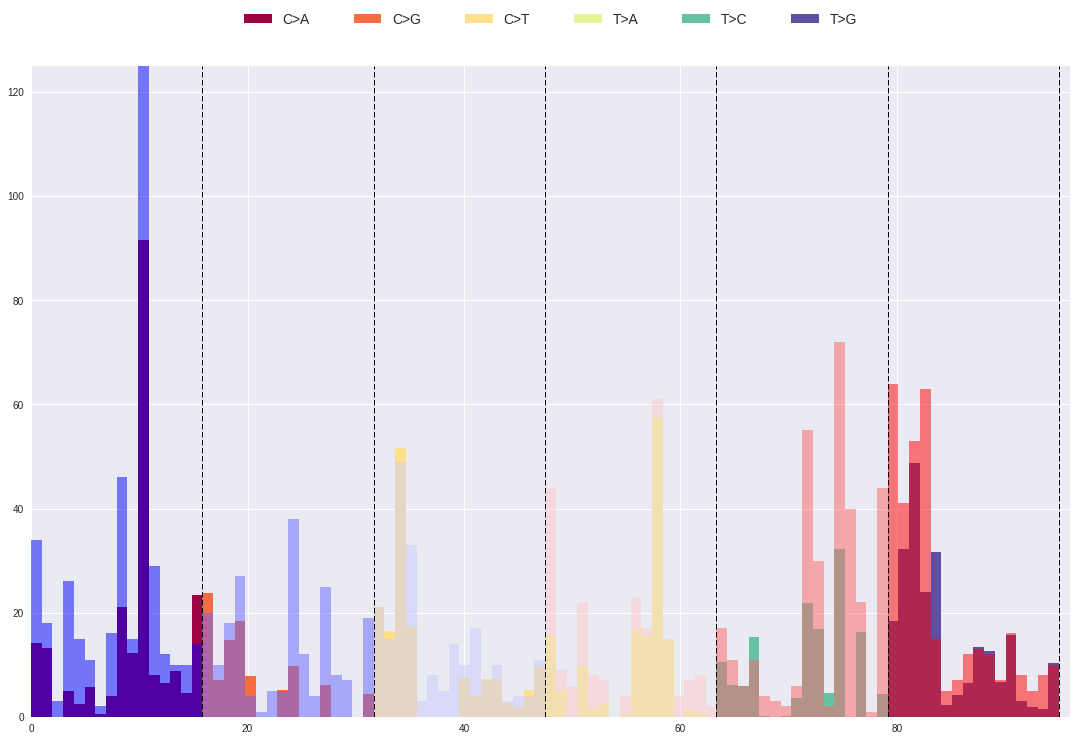

In [32]:
atom=0
print("The percentages of usage is: ", max_values[atom])

sample = data[int(max_indices[atom]), :]
plot_coverage(D[atom,:]*C[int(max_indices[atom]), atom], sample)

('The percentages of usage is: ', 0.30098426133562117)


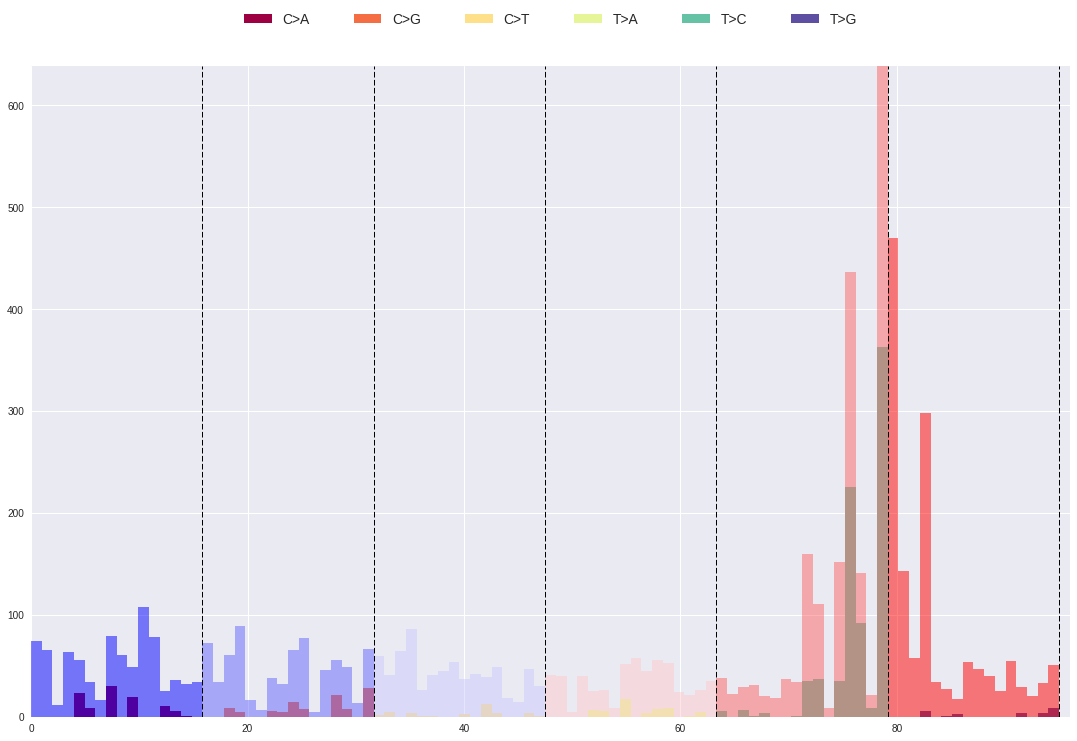

In [33]:
atom=1
print("The percentages of usage is: ", max_values[atom])

sample = data[int(max_indices[atom]), :]
plot_coverage(D[atom,:]*C[int(max_indices[atom]), atom], sample)

In [ ]:
atom=2
print("The percentages of usage is: ", max_values[atom])

sample = data[int(max_indices[atom]), :]
plot_coverage(D[atom,:]*C[int(max_indices[atom]), atom], sample)

In [ ]:
atom=3
print("The percentages of usage is: ", max_values[atom])

sample = data[int(max_indices[atom]), :]
plot_coverage(D[atom,:]*C[int(max_indices[atom]), atom], sample)

In [ ]:
atom=4
print("The percentages of usage is: ", max_values[atom])

sample = data[int(max_indices[atom]), :]
plot_coverage(D[atom,:]*C[int(max_indices[atom]), atom], sample)

In [ ]:
atom=5
print("The percentages of usage is: ", max_values[atom])

sample = data[int(max_indices[atom]), :]
plot_coverage(D[atom,:]*C[int(max_indices[atom]), atom], sample)

(21, 6)
[[ 0.45110988  0.          0.02496634  0.05110031  0.34455383  0.12826963]
 [ 0.05008436  0.28755455  0.15369352  0.02703774  0.43256349  0.04906634]
 [ 0.07460728  0.120721    0.2661162   0.16099114  0.37756439  0.        ]
 [ 0.0632677   0.24407132  0.03753295  0.06839122  0.43208623  0.15465059]
 [ 0.04314035  0.24311925  0.          0.2966297   0.41711071  0.        ]
 [ 0.05216718  0.30098426  0.17049582  0.06872579  0.18656813  0.22105882]
 [ 0.01134896  0.21314957  0.          0.03135714  0.69215945  0.05198488]
 [ 0.44835985  0.03863971  0.08808075  0.12608579  0.29772699  0.00110692]
 [ 0.16724159  0.22503861  0.01602564  0.01185398  0.21259495  0.36724523]
 [ 0.52721567  0.08216328  0.10481641  0.09242217  0.14813559  0.04524688]
 [ 0.34776785  0.05490989  0.2711167   0.11439725  0.11392972  0.09787859]
 [ 0.02763019  0.          0.29925874  0.10509013  0.56802094  0.        ]
 [ 0.26288951  0.24449272  0.23980487  0.04169419  0.21111872  0.        ]
 [ 0.0869898   0.

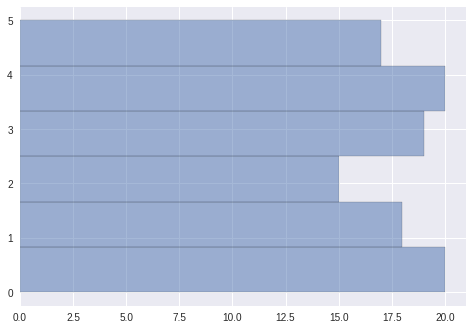

In [34]:
print(percentages.shape)
print(percentages)
frequencies = np.zeros(D.shape[0])
print(percentages.shape)
for atom in range(percentages.shape[1]):
    frequencies[atom]= len(np.nonzero(percentages[:,atom])[0])
print(frequencies)
plt.figure()
plt.hist(np.arange(D.shape[0]),weights=frequencies, bins=D.shape[0], orientation="horizontal", alpha=0.5, histtype='bar', ec='black');
plt.show()

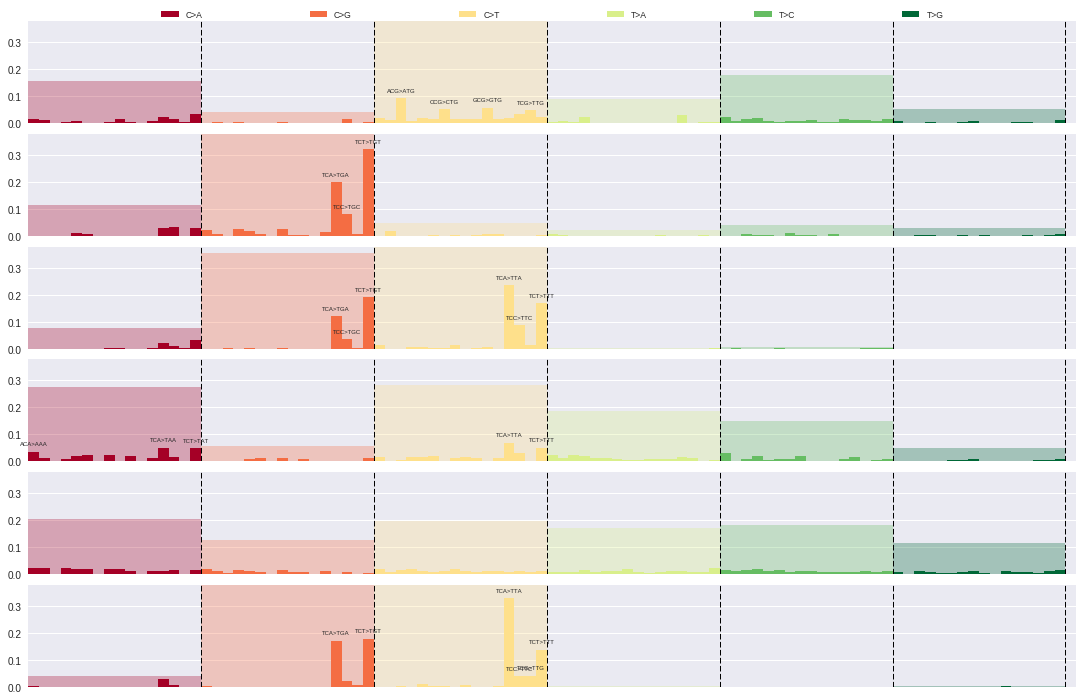

In [35]:
plot_genome_mutations(D_ordered)

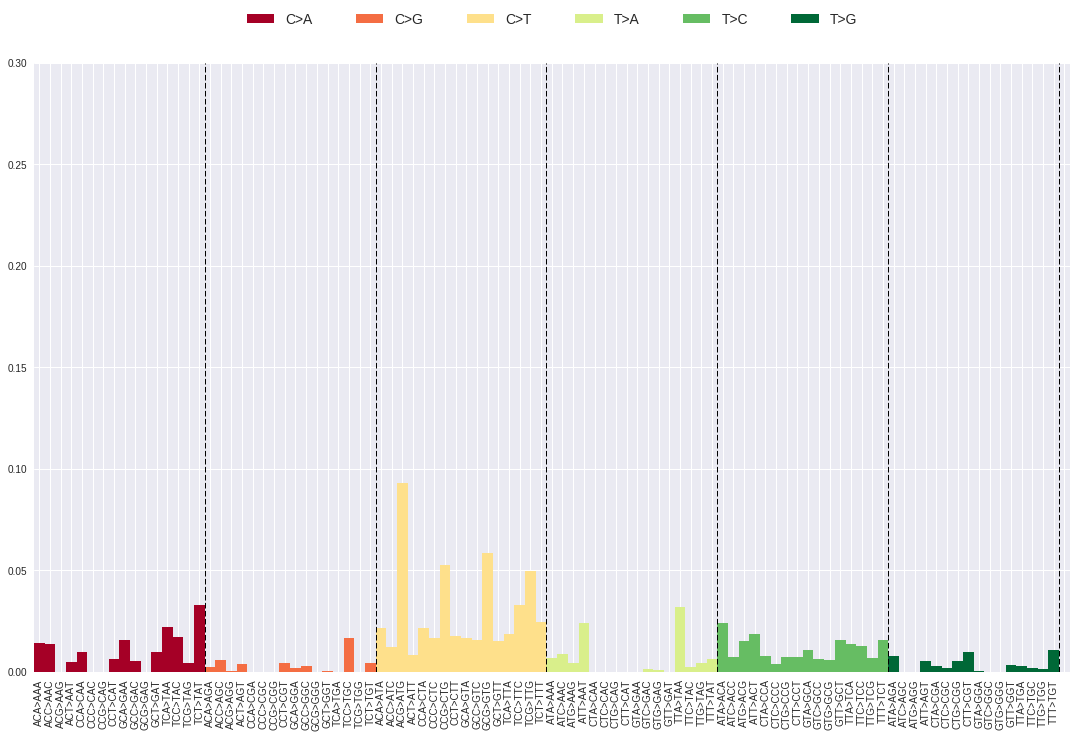

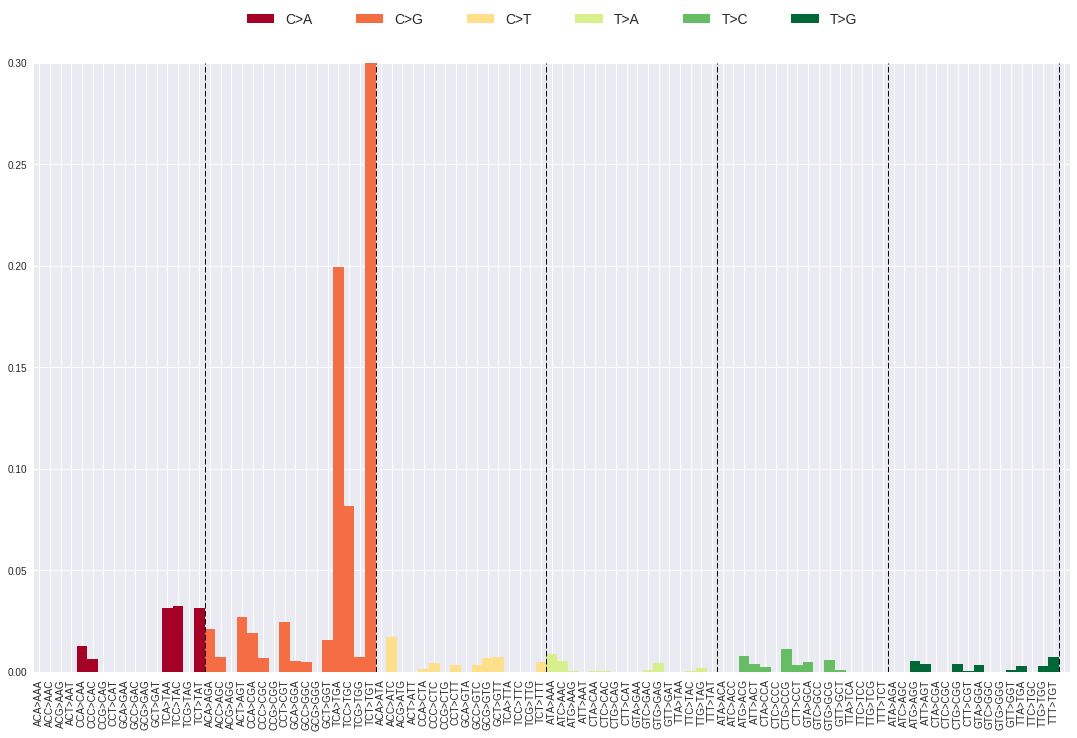

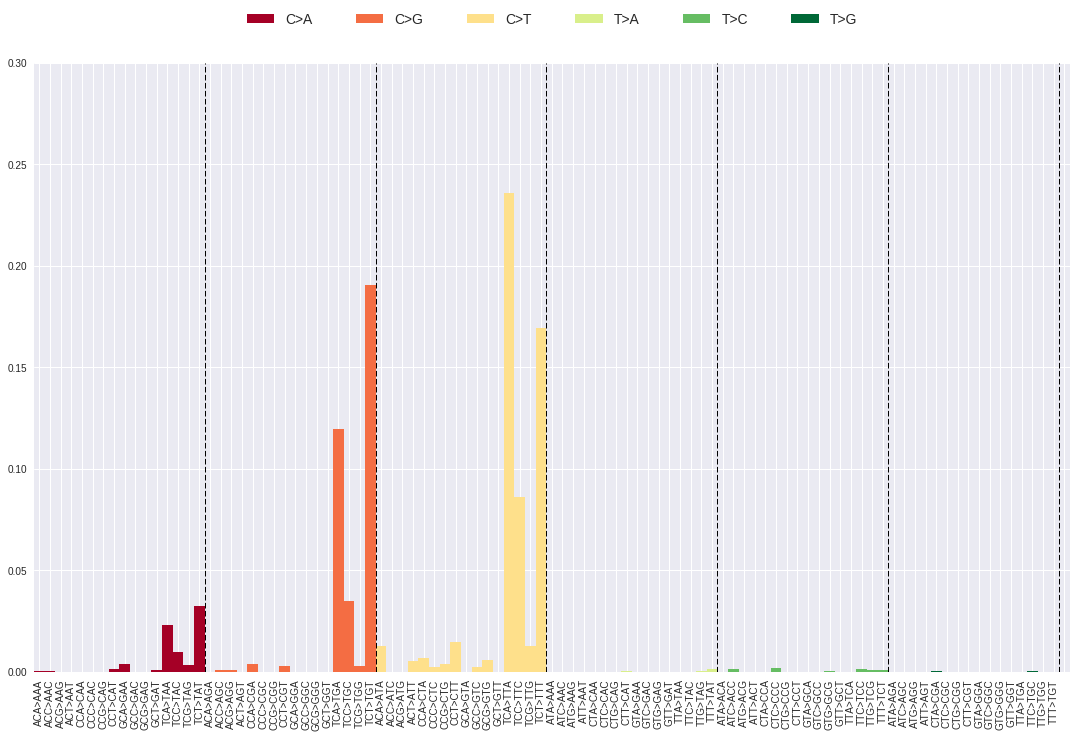

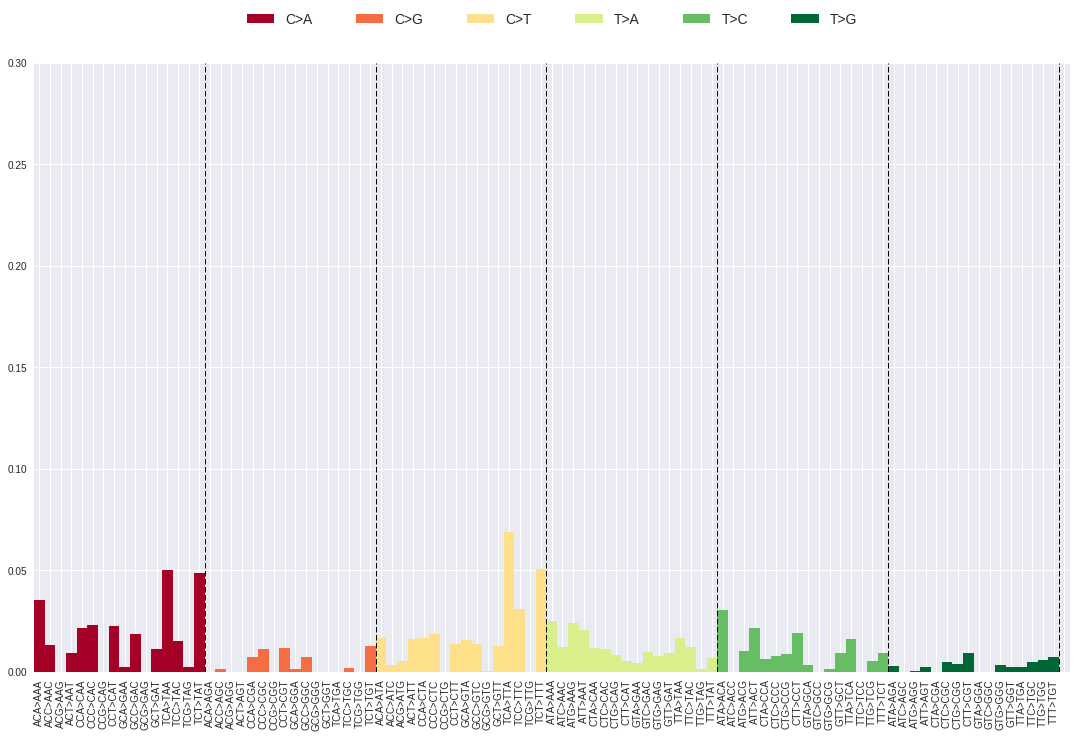

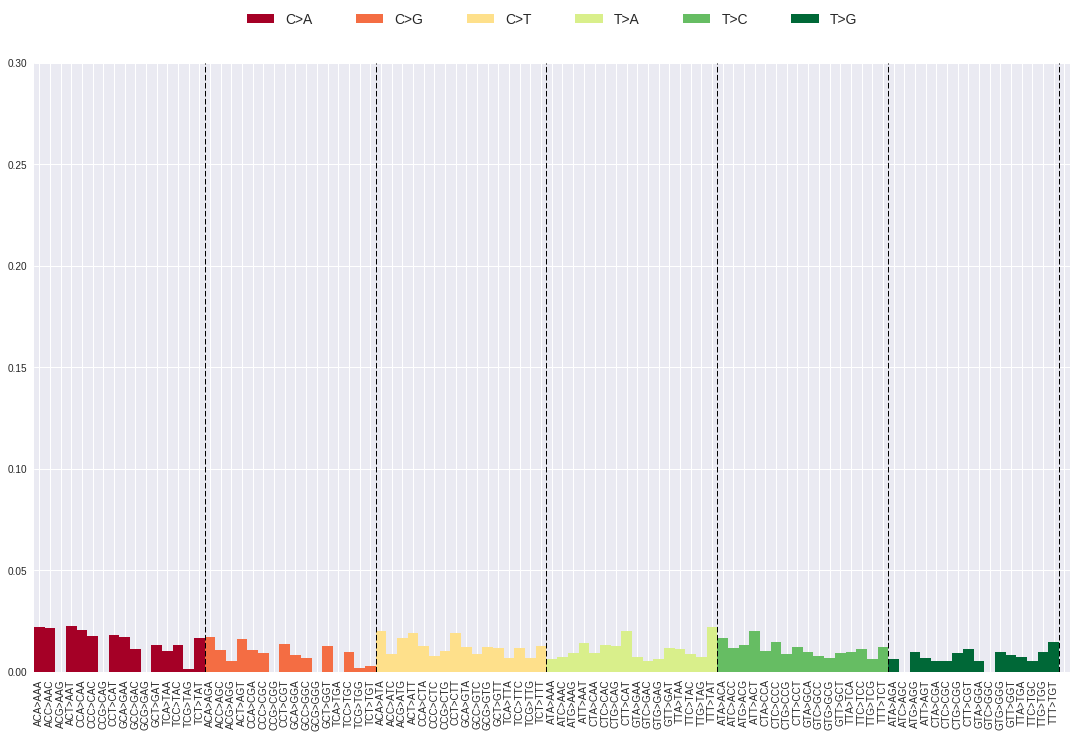

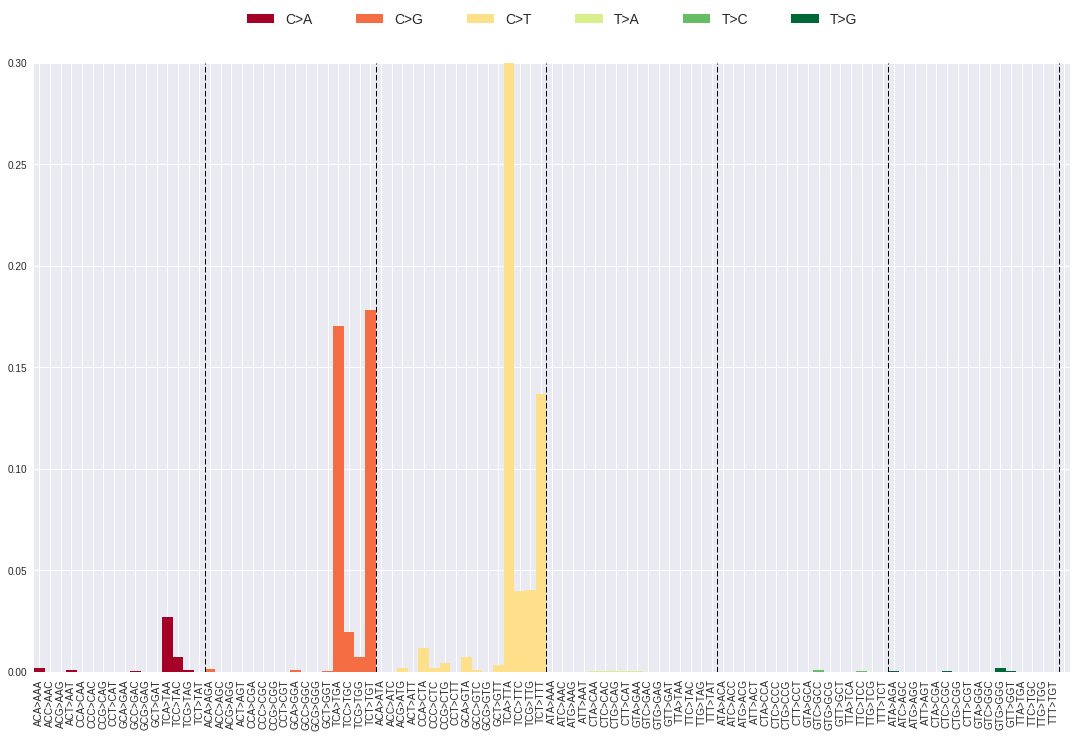

In [36]:
for i in range(D_ordered.shape[0]):
    plot_atom(D_ordered[i,:])